

```

# Aluno: Thiago Patricio da Silva
```

# Análise de Embeddings e Redução da Dimensionalidade

**Objetivo.** Dado um conjunto de textos, gerar embeddings com BERT e investigar a estrutura dos dados via PCA, t-SNE e UMAP. Em seguida, identificar clusters e relacioná-los a categorias semânticas.

In [ ]:
sentences = [
    'I swap butter for olive oil in many recipes.',
    'Canberra is the capital of Australia.',
    'Ottawa is the capital city of Canada.',
    'Paris is the most populated city in France.',
    'Tokyo is among the most populous metropolitan areas worldwide.',
    'I prefer my coffee with no sugar and a splash of milk.',
    'The recipe for pasta carbonara is simple.',
    'A pinch of salt enhances sweetness in desserts.',
    'Alignment techniques reduce harmful outputs.',
    'Explainable AI highlights salient features for decisions.',
    'Transformer models enable long-range language dependencies.',
    'Black swan events stress-test portfolio resilience.',
    'The Sahara Desert spans much of North Africa.',
    'Inflation erodes real purchasing power of cash.',
    'Aromatics like garlic and onion build flavor early.',
    'Value stocks trade at lower multiples relative to fundamentals.',
    'Quantization reduces memory with minimal accuracy loss.',
    'Tax-loss harvesting offsets capital gains.',
    'Investing in technology can be risky.',
    'Fermented foods add acidity and complexity.',
    'Marinating tofu improves texture and taste.',
    'Vector databases power semantic search at scale.',
    'Distillation transfers knowledge from large to small models.',
    'The Great Barrier Reef lies off Australia’s northeast coast.',
    'Retrieval-augmented generation grounds answers in sources.',
    'Iceland lies on the Mid-Atlantic Ridge.',
    'The Baltic states border the eastern Baltic Sea.',
    'Multimodal learning aligns text with images and audio.',
    'Risk tolerance should guide position sizing.',
    'Time in the market beats timing the market.',
    'Behavioral biases can derail investment plans.',
    'Reinforcement learning fine-tunes policies from human feedback.',
    'Edge AI runs models under strict latency constraints.',
    'Deglazing lifts browned bits to make pan sauces.',
    'Tempering chocolate stabilizes cocoa butter crystals.',
    'What is the capital of France?',
    'Johannesburg is a major city but not South Africa’s capital.',
    'The Danube passes through multiple European capitals.',
    'The Amazon River carries one of the largest water volumes on Earth.',
    'A healthy emergency fund reduces forced selling.',
    'I batch-cook grains for quick lunches.',
    'Resting steak helps redistribute the juices.',
    'The Atacama is one of the driest deserts on the planet.',
    'Liquidity risk rises when trading volumes are thin.',
    'Mount Everest is the highest peak above sea level.',
    'Graph neural networks capture relational structure.',
    'Sourdough starter needs regular feedings to stay active.',
    'The stock market experienced a drop today.',
    'Umami-rich ingredients deepen savory dishes.',
    'Al dente pasta retains a slight bite after cooking.',
    'Rebalancing restores target asset allocation.',
    'Continual learning mitigates catastrophic forgetting.',
    'Bond duration measures sensitivity to interest-rate changes.',
    'Diffusion models synthesize high-fidelity images.',
    'Expense ratios compound against long-term returns.',
    'Self-supervised pretraining reduces labeled data needs.',
    'What country contains the city of Kyoto?',
    'Stir-frying requires high heat and constant movement.',
    'Covered calls generate income with capped upside.',
    'The Nile flows northward into the Mediterranean Sea.',
    'Causal inference distinguishes correlation from effect.',
    'Prompt engineering steers generative behavior reliably.',
    'Few-shot prompting improves generalization on new tasks.',
    'Growth investing prioritizes earnings expansion.',
    'The Alps stretch across several central European countries.',
    'The Andes form a continuous mountain range along South America.',
    'I cook vegetarian meals on weekdays to simplify planning.',
    'Natural language processing has advanced greatly.',
    'Sous-vide delivers precise temperature control.',
    'Diversification reduces idiosyncratic risk across holdings.',
    'Sharpe ratio evaluates risk-adjusted performance.',
    'Artificial intelligence is transforming the world.',
    'Credit spreads widen during economic uncertainty.',
    'Emerging markets add diversification but higher volatility.',
    'Mise en place speeds up weeknight cooking.',
    'The Caspian Sea is a landlocked body of water.',
    'Evaluation with benchmarks must avoid data leakage.',
    'Cairo sits along the Nile River delta.',
    'Federated learning trains models without centralizing data.',
    'Lagos is Nigeria’s largest city by population.',
    'Dollar-cost averaging smooths entry price over time.',
    'LoRA adapters enable efficient fine-tuning.',
    'I keep a jar of homemade pesto for pasta.',
    'New Delhi serves as the seat of India’s government.',
    'I like to cook Italian dishes on Sundays.',
    'Roasting vegetables caramelizes natural sugars.',
    'ETFs provide broad market exposure with intraday liquidity.',
    'Proofing time affects a bread’s crumb structure.'
]

## Predição dos Embeddings

Utilize o modelo BERT pré-treinado para gerar embeddings de todos os textos fornecidos.  
O objetivo é obter uma matriz `X` com formato **(N, dim)**, onde **N** é o número de textos e **dim** é a dimensionalidade dos vetores de embedding.

In [ ]:
from sentence_transformers import SentenceTransformer

# Load a pre-trained BERT model
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

# Generate embeddings for all sentences
X = model.encode(sentences, show_progress_bar=True)

print(f"Embeddings shape: {X.shape}")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

Embeddings shape: (88, 384)


## PCA

Aplique **PCA (Principal Component Analysis)** para projetar os embeddings em duas dimensões e visualizar a estrutura global dos dados.  
O PCA ajuda a capturar as direções de maior variância e pode indicar agrupamentos lineares.

**Tarefas:**
- Reduza a dimensionalidade dos embeddings para 2 componentes principais.  
- Plote os pontos resultantes com `matplotlib`, identificando possíveis agrupamentos.  
- Analise qualitativamente se há separação entre textos de temas distintos.

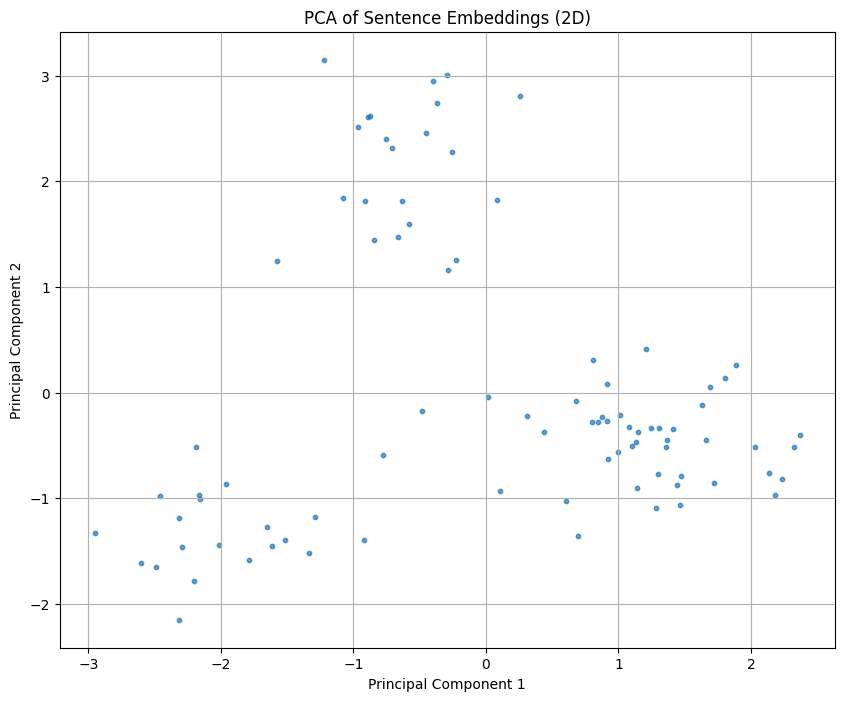

Shape of PCA reduced data: (88, 2)


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#Aplicando PCA e reduzindo a dimsão para 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotando resultasdos
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, s=10) # s=10 for smaller points
plt.title('PCA of Sentence Embeddings (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

print(f"Shape of PCA reduced data: {X_pca.shape}")

## t-SNE

Use **t-SNE (t-distributed Stochastic Neighbor Embedding)** para investigar a estrutura local dos dados.  
Diferente do PCA, o t-SNE tenta preservar vizinhanças locais e pode revelar grupos mais sutis.

**Tarefas:**
- Reduza os embeddings para 2D usando `TSNE` do `scikit-learn`.  
- Ajuste parâmetros como `perplexity` e `learning_rate` para comparar resultados.  
- Visualize o mapa e observe se os textos semelhantes ficam próximos.

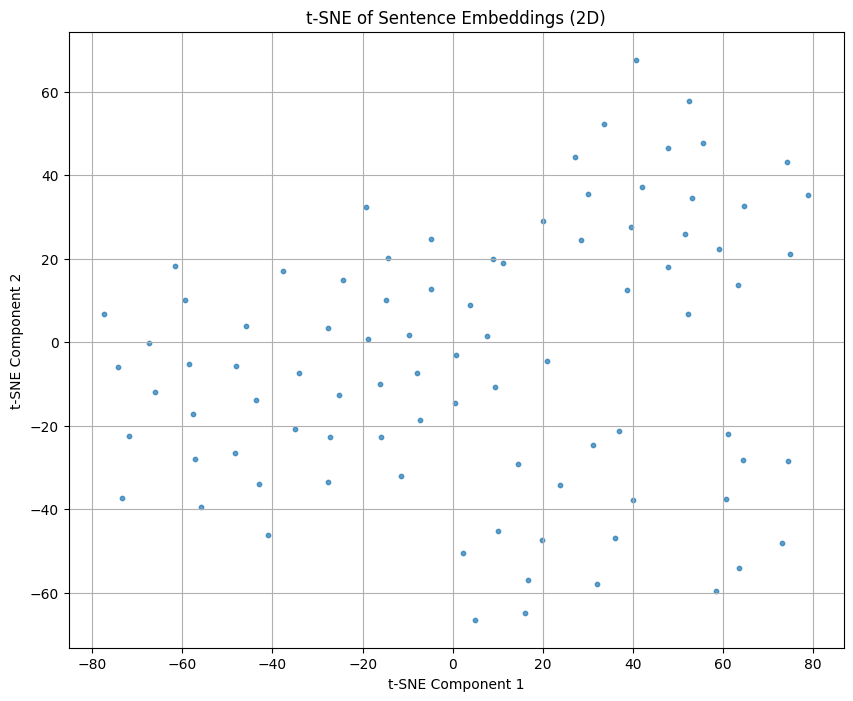

Shape of t-SNE reduced data: (88, 2)


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Aplica t-SNE para reduzir a dimensionalidade para 2 componentes
# É frequentemente recomendado reduzir a dimensionalidade (por exemplo, com PCA) antes do t-SNE
# para dados de alta dimensão, mas para 384 dimensões, pode ser gerenciável.
# Se o cálculo for muito lento, considere aplicar PCA primeiro.

# Usando parâmetros padrão para perplexidade e learning_rate inicialmente.
# perplexidade: controla o equilíbrio entre aspectos locais e globais dos seus dados.
#             Um valor típico varia entre 5 e 50.
# learning_rate: geralmente na faixa [10.0, 1000.0].

ts = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_tsne = ts.fit_transform(X)

# Plota os resultados do t-SNE
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.7, s=10) # s=10 para pontos menores
plt.title('t-SNE dos Embeddings de Sentenças (2D)')
plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.grid(True)
plt.show()

print(f"Shape dos dados reduzidos por t-SNE: {X_tsne.shape}")

## UMAP

Aplique **UMAP (Uniform Manifold Approximation and Projection)** como alternativa ao t-SNE.  
O UMAP é mais eficiente, preserva parte da estrutura global e é útil para visualização e pré-processamento.

**Tarefas:**
- Gere uma projeção 2D dos embeddings com `umap.UMAP`.  
- Experimente variar `n_neighbors` e `min_dist` para observar mudanças na distribuição dos clusters.  
- Compare visualmente com os resultados do PCA e t-SNE.

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


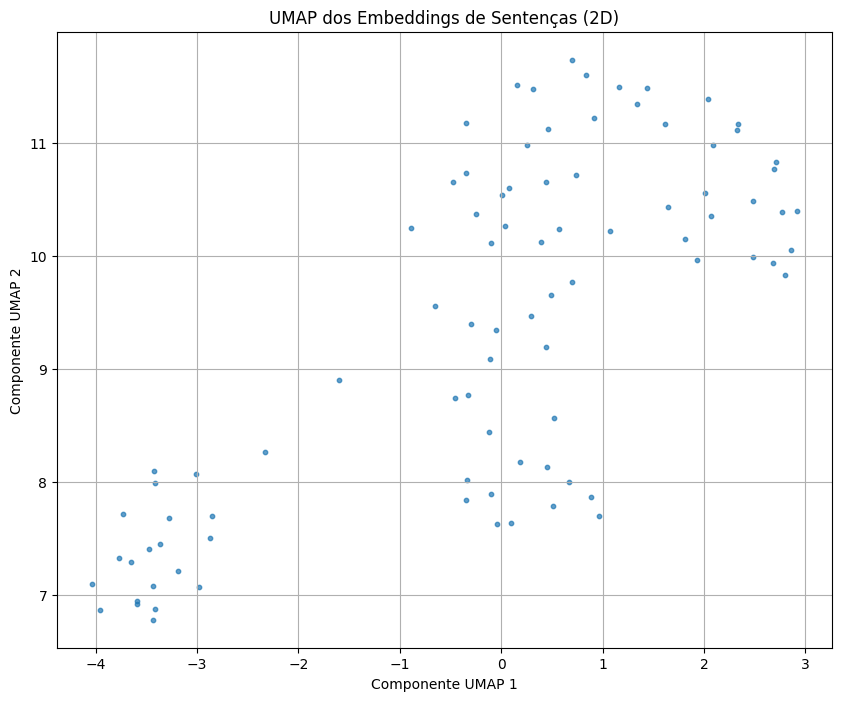

Shape dos dados reduzidos por UMAP: (88, 2)


## Classificação

Com base nas categorias observadas nos gráficos anteriores, crie uma função simples que receba um texto e classifique-o na categoria mais provável.

**Tarefas:**
- Use os embeddings existentes e os clusters identificados para rotular automaticamente cada texto.  
- Crie uma função `classificar_texto(texto: str)` que:
  1. Gere o embedding do texto.
  2. Calcule a distância para os clusters identificados.
  3. Retorne o nome do cluster mais próximo.

# Task
Apply K-Means clustering to the UMAP embeddings (`X_umap`) to identify formal clusters, determining an appropriate number of clusters (K), and visualize the resulting clusters.

## Aplicar K-Means aos embeddings UMAP

### Subtask:
Utilizar o algoritmo K-Means nos embeddings reduzidos por UMAP (`X_umap`) para identificar formalmente os clusters e determinar um número apropriado de clusters (K).


**Reasoning**:
To determine the optimal number of clusters for K-Means, I will first import the necessary libraries, then iterate through a range of possible cluster numbers (k) to calculate and store the inertia (for the Elbow Method) and the Silhouette Score for each k. This will provide the data needed to plot and analyze these metrics.



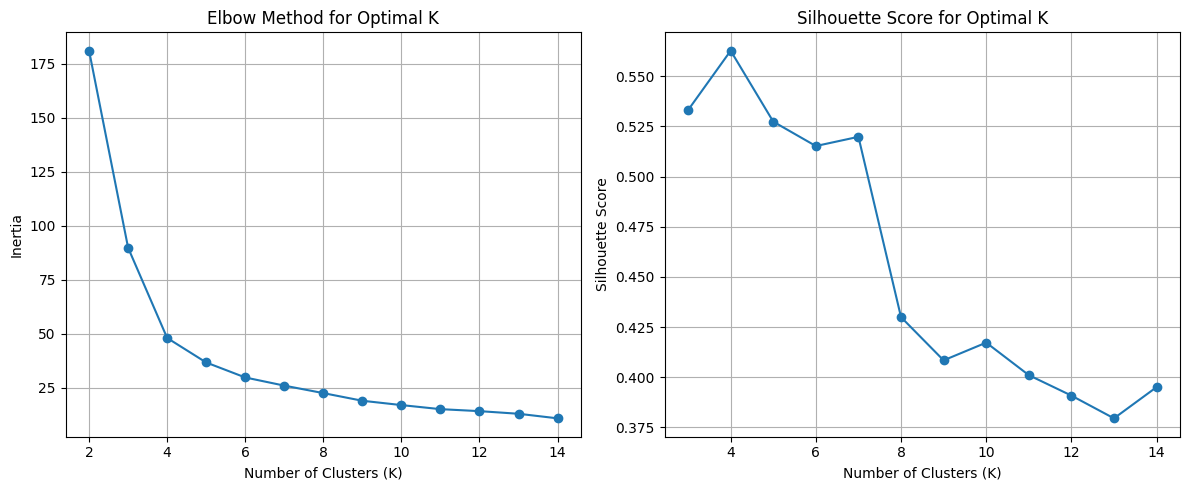

Inertia and Silhouette scores calculated and plotted to determine optimal K.


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Range of k values to test
k_range = range(2, 15)  # From 2 to 14 clusters

inertia_values = []
silhouette_scores = []

# Loop through k values, fit KMeans, and calculate metrics
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init is important for consistent results
    kmeans.fit(X_umap)
    inertia_values.append(kmeans.inertia_)

    # Calculate Silhouette Score only if k > 1
    if k > 1:
        score = silhouette_score(X_umap, kmeans.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(np.nan) # Placeholder for k=1, which is not valid for silhouette score

# Plotting the Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)

# Plotting the Silhouette Score
plt.subplot(1, 2, 2)
# Adjust k_range for silhouette_scores as it starts from k=2
plt.plot(k_range[1:], silhouette_scores[1:], marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

print("Inertia and Silhouette scores calculated and plotted to determine optimal K.")

**Reasoning**:
Based on the Elbow Method and Silhouette Score plots, a value of K=4 appears to be a reasonable choice, as it represents a good trade-off between minimizing inertia and achieving a relatively high silhouette score. Now, I will apply KMeans clustering with K=4 to the UMAP embeddings and then visualize the resulting clusters.



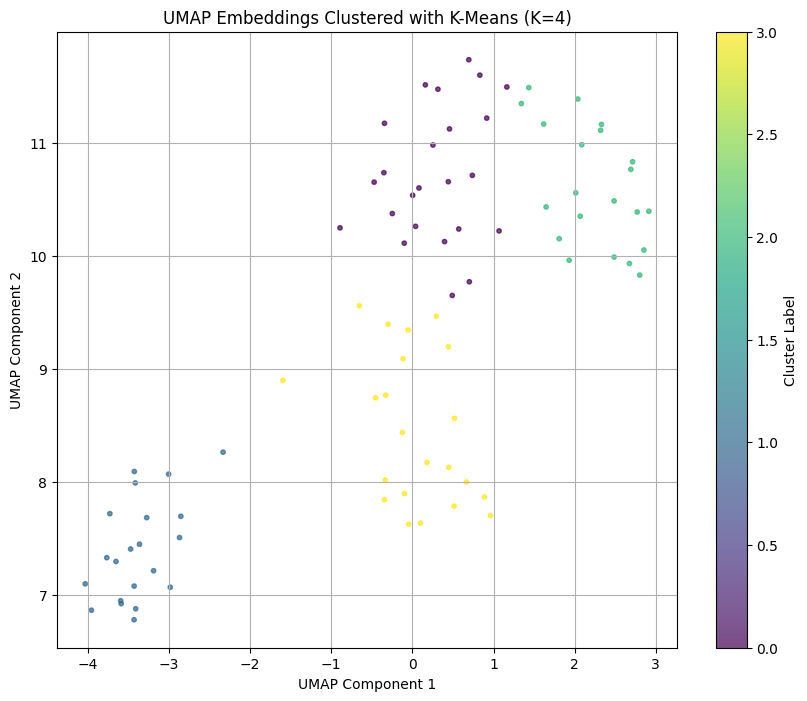

K-Means clustering applied with K=4. Cluster labels generated and visualized.


In [ ]:
import matplotlib.pyplot as plt

# Choose the optimal number of clusters based on the plots
optimal_k = 4  # Based on visual inspection of elbow and silhouette plots

# Apply KMeans clustering with the chosen K
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_model.fit_predict(X_umap)

# Visualize the clustered UMAP embeddings
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=cluster_labels, cmap='viridis', s=10, alpha=0.7)
plt.title(f'UMAP Embeddings Clustered with K-Means (K={optimal_k})')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()

print(f"K-Means clustering applied with K={optimal_k}. Cluster labels generated and visualized.")

## Analisar e rotular clusters

### Subtask:
Inspecionar os textos que pertencem a cada cluster identificado para inferir e atribuir rótulos semânticos significativos (ex: 'Culinária', 'Geografia', 'Finanças').


**Reasoning**:
To analyze the clusters, I need to combine the original sentences with their assigned cluster labels into a single structure, such as a Pandas DataFrame. This will facilitate inspecting the content of each cluster.



In [ ]:
import pandas as pd

# Create a DataFrame combining sentences and cluster labels
df_clustered_sentences = pd.DataFrame({
    'sentence': sentences,
    'cluster_label': cluster_labels
})

print("DataFrame with sentences and cluster labels created successfully.")
print(df_clustered_sentences.head())

DataFrame with sentences and cluster labels created successfully.
                                            sentence  cluster_label
0       I swap butter for olive oil in many recipes.              1
1              Canberra is the capital of Australia.              3
2              Ottawa is the capital city of Canada.              3
3        Paris is the most populated city in France.              3
4  Tokyo is among the most populous metropolitan ...              3


**Reasoning**:
Now that the DataFrame with clustered sentences is created, I need to inspect the content of each cluster to infer semantic labels. I will iterate through each unique cluster label and print a sample of sentences from that cluster. This will help in understanding the common themes within each group.



In [ ]:
for cluster_id in sorted(df_clustered_sentences['cluster_label'].unique()):
    print(f"\n--- Cluster {cluster_id} ---")
    # Display up to 5 sample sentences from each cluster
    sample_sentences = df_clustered_sentences[df_clustered_sentences['cluster_label'] == cluster_id]['sentence'].sample(min(5, len(df_clustered_sentences[df_clustered_sentences['cluster_label'] == cluster_id])), random_state=42).tolist()
    for i, sentence in enumerate(sample_sentences):
        print(f"  {i+1}. {sentence}")

print("Sample sentences from each cluster displayed for semantic analysis.")


--- Cluster 0 ---
  1. Reinforcement learning fine-tunes policies from human feedback.
  2. Prompt engineering steers generative behavior reliably.
  3. Alignment techniques reduce harmful outputs.
  4. Natural language processing has advanced greatly.
  5. Rebalancing restores target asset allocation.

--- Cluster 1 ---
  1. I swap butter for olive oil in many recipes.
  2. I keep a jar of homemade pesto for pasta.
  3. I cook vegetarian meals on weekdays to simplify planning.
  4. I prefer my coffee with no sugar and a splash of milk.
  5. Tempering chocolate stabilizes cocoa butter crystals.

--- Cluster 2 ---
  1. Black swan events stress-test portfolio resilience.
  2. Credit spreads widen during economic uncertainty.
  3. Diversification reduces idiosyncratic risk across holdings.
  4. Inflation erodes real purchasing power of cash.
  5. A healthy emergency fund reduces forced selling.

--- Cluster 3 ---
  1. Canberra is the capital of Australia.
  2. Mount Everest is the highes

**Reasoning**:
Based on the manual inspection of sample sentences from each cluster, I will now assign a semantic label to each cluster and store these labels in a dictionary, mapping cluster IDs to their descriptive names.



In [ ]:
semantic_labels = {
    0: 'Inteligência Artificial & Tecnologia',
    1: 'Culinária',
    2: 'Finanças & Investimentos',
    3: 'Geografia'
}

# Map the semantic labels to the DataFrame
df_clustered_sentences['semantic_label'] = df_clustered_sentences['cluster_label'].map(semantic_labels)

print("Semantic labels assigned to clusters:")
for cluster_id, label in semantic_labels.items():
    print(f"  Cluster {cluster_id}: {label}")

print("\nDataFrame with semantic labels head:")
print(df_clustered_sentences.head())

Semantic labels assigned to clusters:
  Cluster 0: Inteligência Artificial & Tecnologia
  Cluster 1: Culinária
  Cluster 2: Finanças & Investimentos
  Cluster 3: Geografia

DataFrame with semantic labels head:
                                            sentence  cluster_label  \
0       I swap butter for olive oil in many recipes.              1   
1              Canberra is the capital of Australia.              3   
2              Ottawa is the capital city of Canada.              3   
3        Paris is the most populated city in France.              3   
4  Tokyo is among the most populous metropolitan ...              3   

  semantic_label  
0      Culinária  
1      Geografia  
2      Geografia  
3      Geografia  
4      Geografia  


## Calcular Centroides dos Clusters

### Subtask:
Computar o embedding médio (centroide) para cada cluster identificado. Esses centroides representarão a 'essência' semântica de cada categoria.


**Reasoning**:
To compute the centroid for each cluster, I will group the UMAP embeddings by their assigned cluster labels and then calculate the mean of the embeddings within each group. This will result in a centroid vector for each cluster, representing its average position in the UMAP space.



In [ ]:
cluster_centroids = {}

for cluster_id in sorted(df_clustered_sentences['cluster_label'].unique()):
    # Get the indices of sentences belonging to the current cluster
    cluster_indices = df_clustered_sentences[df_clustered_sentences['cluster_label'] == cluster_id].index

    # Select the UMAP embeddings for these sentences
    embeddings_in_cluster = X_umap[cluster_indices]

    # Calculate the mean of these embeddings to get the centroid
    centroid = np.mean(embeddings_in_cluster, axis=0)

    # Store the centroid
    cluster_centroids[cluster_id] = centroid

print("Cluster centroids calculated successfully:")
for cluster_id, centroid in cluster_centroids.items():
    print(f"  Cluster {cluster_id} centroid shape: {centroid.shape}")
    # print(f"  Cluster {cluster_id} centroid: {centroid[:5]}...") # Print first 5 elements for brevity

Cluster centroids calculated successfully:
  Cluster 0 centroid shape: (2,)
  Cluster 1 centroid shape: (2,)
  Cluster 2 centroid shape: (2,)
  Cluster 3 centroid shape: (2,)
